In [2]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
model_folder = 'C:/Users\lukec\PycharmProjects\emissions-tracking-conda\emissions-tracking\models/'#CT_manufacturing/'
sub_folders = ['petrochemicals', 'CT_manufacturing', 'unfccc']

In [13]:
file_df = pd.DataFrame()
for sub_folder in sub_folders:
    clf_files = pd.DataFrame([file for file in os.listdir(model_folder+sub_folder) if 'split' in file and '.npy' in file], columns=['file'])
    clf_files['dataset'] = sub_folder
    file_df = pd.concat((file_df, clf_files))

In [28]:
file_df

,file,dataset
0,clf_decisionTreeClassifier_l1_split03999999999...,petrochemicals
1,clf_decisionTreeClassifier_l1_split03999999999...,petrochemicals
2,clf_decisionTreeClassifier_l1_split08999999999...,petrochemicals
3,clf_decisionTreeClassifier_l1_split08999999999...,petrochemicals
4,clf_decisionTreeClassifier_l1_split13999999999...,petrochemicals
...,...,...
464,clf_SAGE-h64_l3_split7899999999999998_230601.npy,unfccc
465,clf_SAGE-h64_l3_split8399999999999999_230601.npy,unfccc
466,clf_SAGE-h64_l3_split8899999999999999_230601.npy,unfccc
467,clf_SAGE-h64_l3_split94_230601.npy,unfccc


## Figure 3 - Performance with increasing training data

In [31]:
# Performance for different classifiers and levels
all_scores = pd.DataFrame()
for i, file in enumerate(file_df.iloc):
    scores = np.load(model_folder+file['dataset']+'/'+file['file'], allow_pickle=True).item()
    df = pd.DataFrame.from_dict(scores, orient='index').transpose()
    df['Name'] = file['file'].split('_')[1]
    df['Level'] = file['file'].replace('__','_').split('_')[2][1]
    df['Percentage'] = file['file'].split('_')[3][5:8]
    df['Dataset'] = file['dataset']
    df['Class'] = file['file'][:-10]
    df['Date'] = file['file'][-10:-4]

    all_scores = pd.concat((all_scores, df))

all_scores = all_scores[all_scores['Date'].astype(int) > 230525]
all_scores = all_scores.groupby(['Dataset', 'Class']).last().reset_index()
all_scores['Percentage'] = [1-np.round(float('0.'+i), 2) for i in all_scores['Percentage']]

C:\Users\lukec\AppData\Roaming\Python\Python39\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [32]:
all_scores

,Dataset,Class,confusion,overall_acc,average_acc,kappa,IoU,Name,Level,Percentage,Date
0,CT_manufacturing,clf_SAGE-h64_l1_split08999999999999919_,"[[3786, 1138, 1237, 1073], [1509, 2633, 1766, ...",0.585102,0.589150,0.447686,0.413585,SAGE-h64,1,0.91,230528
1,CT_manufacturing,clf_SAGE-h64_l1_split13999999999999924_,"[[6092, 1647, 1926, 1681], [2357, 4045, 2729, ...",0.586208,0.590007,0.448990,0.414424,SAGE-h64,1,0.86,230528
2,CT_manufacturing,clf_SAGE-h64_l1_split18999999999999928_,"[[8195, 2259, 2643, 2231], [3316, 5539, 3430, ...",0.585748,0.588583,0.448130,0.414097,SAGE-h64,1,0.81,230528
3,CT_manufacturing,clf_SAGE-h64_l1_split23999999999999932_,"[[10281, 2820, 3405, 2762], [3950, 6890, 4602,...",0.586588,0.588771,0.449302,0.415302,SAGE-h64,1,0.76,230528
4,CT_manufacturing,clf_SAGE-h64_l1_split28999999999999937_,"[[12115, 3718, 4051, 3366], [4850, 8596, 5228,...",0.584177,0.586600,0.446127,0.412907,SAGE-h64,1,0.71,230528
...,...,...,...,...,...,...,...,...,...,...,...
1070,unfccc,clf_randomForestClassifier-n50_l3_split7899999...,"[[26579, 10647, 5265, 2762], [10714, 18379, 11...",0.505286,0.506659,0.340382,0.342025,randomForestClassifier-n50,3,0.21,230530
1071,unfccc,clf_randomForestClassifier-n50_l3_split8399999...,"[[27379, 12715, 5820, 2788], [12281, 20500, 11...",0.487929,0.487549,0.317191,0.328125,randomForestClassifier-n50,3,0.16,230530
1072,unfccc,clf_randomForestClassifier-n50_l3_split8899999...,"[[28792, 11081, 6610, 3343], [13613, 17792, 13...",0.466067,0.467441,0.287935,0.306837,randomForestClassifier-n50,3,0.11,230530
1073,unfccc,clf_randomForestClassifier-n50_l3_split94_,"[[27794, 14167, 6943, 5708], [12364, 18877, 13...",0.435446,0.431126,0.246600,0.284226,randomForestClassifier-n50,3,0.06,230530


In [33]:
names_dict = {'linearmean':'Mean', 'poly3':'Polynomial',
              'linearLogisticRegression': 'Logistic Regression', 'linearSGDClassifier':'SGD', 'linearSVC':'SVC', 'linearPassiveAggressiveClassifier':'Passive Aggressive', 'naiveBayesClassifier':'Naive Bayes', 'decisionTreeClassifier':'Decision Tree', 'KNeighboursClassifier':'k Nearest Neighbours', 'linearPerceptron':'Perceptron',
              'adaBoostClassifier':'AdaBoost', 'randomForestClassifier-n50': 'Random Forest',
              'mlpClassifier': 'Multilayer Perceptron', 'DeepNet':'DeepNet', 'LSTM':'LSTM', 'ResNet':'ResNet',
              'GCN-h64':'GCN', 'SAGE-h64':'SAGE'}
all_scores['Name'] = all_scores['Name'].replace(names_dict)

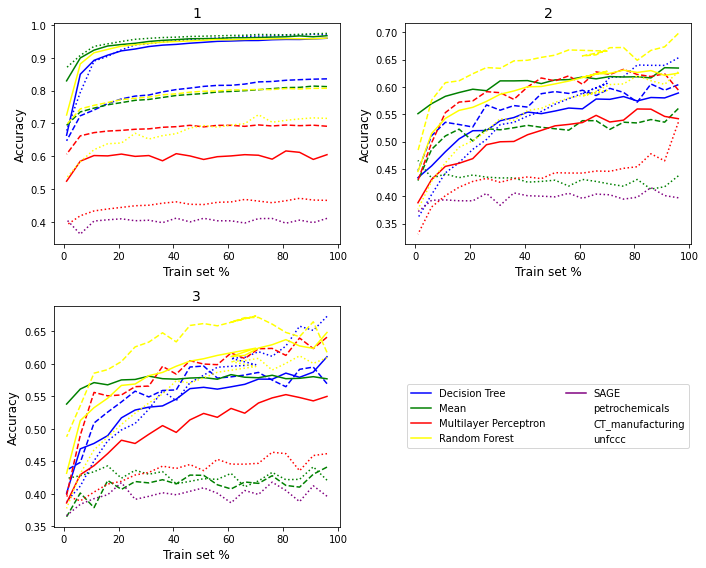

In [64]:
fig = plt.figure(figsize=[10,8], facecolor='white')
fontsize=12
#colors = ['b','g','y','orange','r']#['#bed6ea', '#80afd6', '#4288c2', '#2b5d87', '#17334a']
color_dict = {'Mean':'g', 'Decision Tree':'b', 'Random Forest':'yellow', 'Multilayer Perceptron':'r', 'SAGE':'purple'}
all_scores = all_scores[[i in list(color_dict.keys()) for i in all_scores['Name']]]
# Add labels and title to the plot

# Plot each category as a line
for num, level in enumerate(all_scores['Level'].unique()):
    use_data = all_scores[all_scores['Level']==level]
    ax = fig.add_subplot(2,2,num+1)
    for (model, color) in zip(use_data['Name'].unique(), pd.Series(use_data['Name'].unique()).replace(color_dict)):
        model_used = use_data[use_data['Name']==model]
        for (dataset, type) in zip(sub_folders, ['-', '--', ':']):#model_used['Level'].sort_values().unique()

            df = model_used[model_used['Dataset'] == str(dataset)]
            ax.plot(df['Percentage'].astype(float)*100, df['average_acc'], label=model if dataset=='petrochemicals' else None, color=color, linestyle=type)

            ax.set_xlabel('Train set %', fontsize=fontsize)
            ax.set_ylabel('Accuracy', fontsize=fontsize)
            ax.set_title(level, fontsize=fontsize+2)

    if num==2:

        for (dataset, type) in zip(sub_folders, ['-', '--', ':']):
            ax.plot(df['Percentage'].astype(float)*100, df['average_acc'], label=dataset, color='k', linestyle=type, alpha=0)
        ax_legend = fig.add_subplot(2,2,4, frame_on=False)
        ax_legend.axis('off')
        ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', ncol=2)


        #ax.legend(title='Gap filling level')
fig.tight_layout()

In [20]:
fig.savefig('C:/Users\lukec\PycharmProjects\emissions-tracking-conda\emissions-tracking\outputs\GRL_for_IE/data_increase_nongraph.png')

## Histogram version

In [34]:
#all_scores = all_scores.drop_duplicates(subset=['Dataset', 'Name', 'Percentage'])
all_scores = all_scores[all_scores['Percentage']!=0.7]

In [35]:
all_scores[all_scores['Dataset']=='petrochemicals']

,Dataset,Class,confusion,overall_acc,average_acc,kappa,IoU,Name,Level,Percentage,Date
360,petrochemicals,clf_SAGE-h64_l1_split5899999999999996_,"[[399527, 21400, 12826, 17131], [43622, 22050,...",0.668741,0.495439,0.431884,0.528342,SAGE,1,0.41,230528
361,petrochemicals,clf_SAGE-h64_l1_split6399999999999997_,"[[440589, 16136, 10839, 21393], [53238, 16903,...",0.669061,0.484156,0.422609,0.521963,SAGE,1,0.36,230528
362,petrochemicals,clf_SAGE-h64_l1_split6899999999999997_,"[[476159, 17030, 10974, 22998], [54736, 19319,...",0.673133,0.489681,0.431872,0.527345,SAGE,1,0.31,230528
363,petrochemicals,clf_SAGE-h64_l1_split7399999999999998_,"[[506915, 21266, 11040, 26596], [59410, 23135,...",0.668326,0.486649,0.423789,0.521822,SAGE,1,0.26,230528
364,petrochemicals,clf_SAGE-h64_l1_split7899999999999998_,"[[541349, 20746, 20122, 21923], [62256, 23114,...",0.672079,0.493643,0.432323,0.529811,SAGE,1,0.21,230528
...,...,...,...,...,...,...,...,...,...,...,...
705,petrochemicals,clf_randomForestClassifier-n50_l3_split7899999...,"[[557601, 23938, 11147, 7397], [54029, 47551, ...",0.726994,0.566689,0.531746,0.598385,Random Forest,3,0.21,230530
706,petrochemicals,clf_randomForestClassifier-n50_l3_split8399999...,"[[599361, 25049, 12183, 7919], [59636, 46781, ...",0.720241,0.547057,0.511308,0.589580,Random Forest,3,0.16,230530
707,petrochemicals,clf_randomForestClassifier-n50_l3_split8899999...,"[[634027, 25551, 13300, 10535], [65539, 45874,...",0.710363,0.532447,0.491790,0.576309,Random Forest,3,0.11,230530
708,petrochemicals,clf_randomForestClassifier-n50_l3_split94_,"[[665249, 27738, 16432, 12075], [74057, 46409,...",0.694701,0.512667,0.465940,0.560434,Random Forest,3,0.06,230530


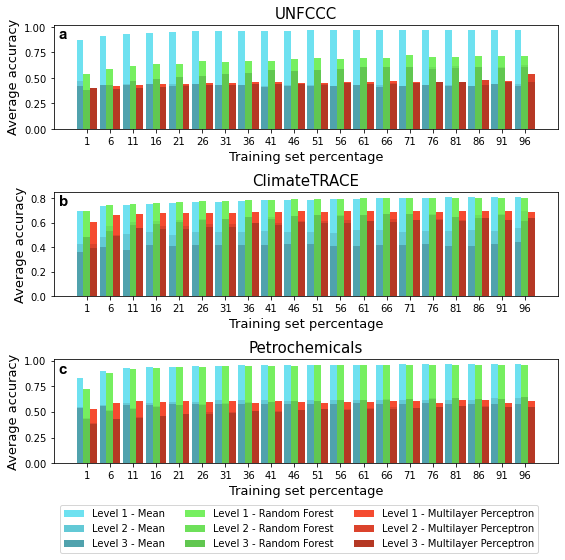

In [64]:
fig, axs = plt.subplots(3,1, figsize=(8, 8), facecolor='white')

#axs = [axs[0,0], axs[1,0], axs[0,1], axs[1,1]]
axs = [axs[0], axs[1], axs[2]]#, axs[3]]

fontsize = 13

datasets = ['unfccc', 'CT_manufacturing', 'petrochemicals']
dataset_names = ['UNFCCC', 'ClimateTRACE', 'Petrochemicals']

for i, (dataset, dataset_name, ax) in enumerate(zip(datasets, dataset_names, axs)):
    single_dataset = all_scores[all_scores['Dataset']==dataset]
    models = ['Mean', 'Random Forest', 'Multilayer Perceptron']
    metric = 'average_acc'
    width = 0.015
    offsets = [-0.015, 0, 0.015]
    color_vectors = [['#6EE1F0', '#63C9D6', '#50A2AD'], ['#76EF60', '#6EE05A','#61C750'], ['#F54B30', '#DB432C','#B53824']]

    # Create the histogram
    for model, offset, colors in zip(models, offsets, color_vectors):
        data = single_dataset[single_dataset['Name']==model]
        for j in range(1,4):
            level_data = data[data['Level']==str(j)]
            ax.bar(
                level_data['Percentage'] + offset,
                level_data[metric],
                width=width,
                align='center',
                label='Level '+str(j)+' - '+ model,
                color = [colors[j-1]]
            )

    # Add legend
    #ax.legend(bbox_to_anchor=(1, 0.9))

    # Set labels and title
    ax.set_xlabel('Training set percentage', fontsize=fontsize)
    ax.set_ylabel('Average accuracy', fontsize=fontsize)
    ax.set_title(dataset_name, fontsize=fontsize+2)

    # Set x-axis ticks and labels
    time_step_indices = np.arange(0.01, 0.99, 0.05)
    ax.set_xticks(time_step_indices, np.arange(1, 99, 5))
    #ax.set_xtickslabels(time_step_indices*100)

    letter = ['a', 'b', 'c']
    ax.text(0.01, 0.97, letter[i], transform = ax.transAxes, fontsize=fontsize+2, fontweight = 'bold', color = 'black', va='top', ha='left', **{'fontname':'Arial'})

# ax_legend = fig.add_subplot(2,2,4, frame_on=False)
#axs[3].axis('off')
#axs[2].legend(*ax.get_legend_handles_labels(), loc='center', ncol=3)
axs[2].legend(*ax.get_legend_handles_labels(), bbox_to_anchor=[0.97, -0.35], ncol=3)



fig.tight_layout()

In [65]:
fig.savefig('C:/Users\lukec\PycharmProjects\emissions-tracking-conda\emissions-tracking\outputs\GRL_for_IE/data_increase_histogram.png')